In [109]:
#Generate dataset
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>200:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [110]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
256      6       1       1       1       1       1       1       1       1   
182      4       1       1       1       1       1       1       1       1   
49       0       1       1       1       1       1       1       1       1   
60       1       1       1       1       1       1       1       1       1   
184      4       1       1       1       1       1       1       1       1   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
144      3       1       1       1       1       1       1       1       1   
324      9       1       1       1       1       1       1       1       1   
343      9       1       1       1       1       1       1       1       1   
180      4       1       1       1       1       1       1       1       1   
176      4       1       1       1       1       1       1       1       1   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [111]:
X = data.drop(["label"],axis=1)
Y= data["label"]

4


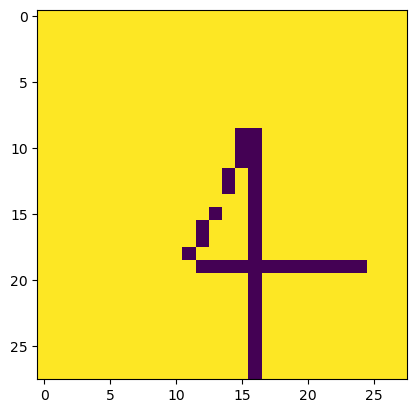

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 178
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [113]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)


9


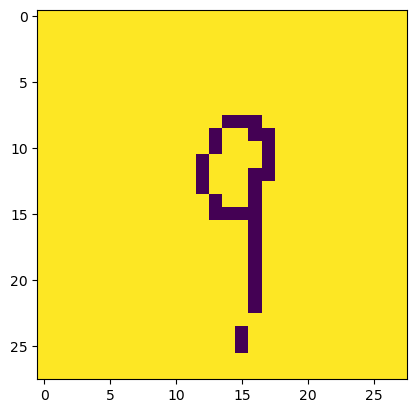

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 340
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)